In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hdbscan

In [3]:
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [4]:
embedding_size = 100
embeddings = pd.read_csv('word2vec_preprocessed_embeddings/embedding_%d.csv' % embedding_size, sep='\t', header=None, dtype=float)
labels = pd.read_csv('word2vec_preprocessed_embeddings/labels_%d.csv' % embedding_size, sep='\t', header=None, dtype=str, names=['action_label'])

In [194]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5,min_samples=2 ,gen_min_span_tree=True)

In [195]:
clusterer.fit(embeddings)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=2, p=None,
    prediction_data=False)

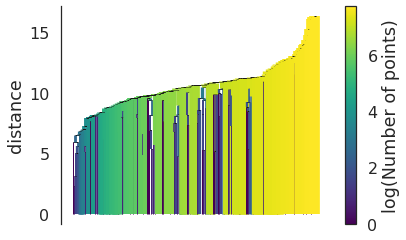

In [196]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
plt.show()

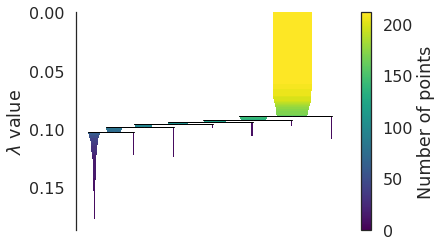

In [197]:
clusterer.condensed_tree_.plot()
plt.show()

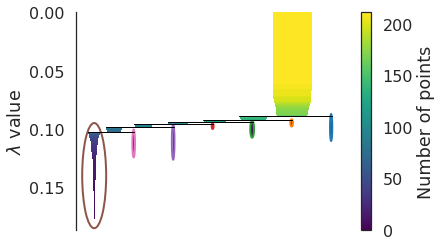

In [198]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [199]:
def plot_clusters(df):
    plt.subplots()
    palette = sns.color_palette()
    cluster_colors = [sns.desaturate(palette[col], sat)
                      if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                      zip(clusterer.labels_, clusterer.probabilities_)]
    #color_set = set([sns.desaturate(palette[col], 1) if col >= 0 else (0.5, 0.5, 0.5) for col in clusterer.labels_])
    df['color'] = cluster_colors
    df['label'] = clusterer.labels_
    for i, group in df.groupby('label'):
        plt.scatter(group['x'], group['y'], c=group['color'], label='cluster %d' % i, **plot_kwds)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

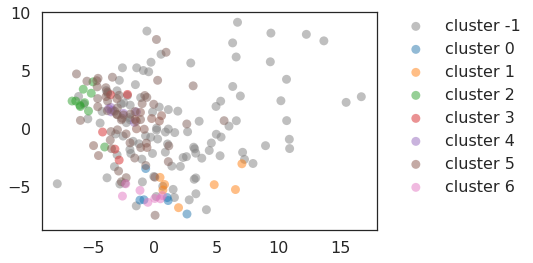

In [200]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc = pca.fit_transform(embeddings)
pc = pd.DataFrame(data = pc, columns = ['x', 'y'])
plot_clusters(pc)

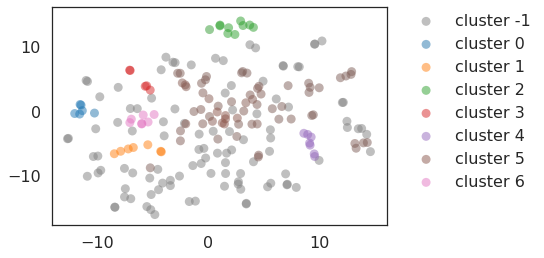

In [201]:
from sklearn.manifold import TSNE

tsne_data = TSNE(n_components=2).fit_transform(embeddings)
tsne_data = pd.DataFrame(data = tsne_data, columns = ['x', 'y'])
plot_clusters(tsne_data)

In [192]:
labels['cluster_labels'] = clusterer.labels_
labels['cluster_prob'] = clusterer.probabilities_

In [193]:

labels = labels.sort_values(by=['cluster_labels','cluster_prob'], ascending=False)
labels

,action_label,cluster_labels,cluster_prob
185,order_overview_check_cancelled_subs,6,1.000000
139,click_add_account,6,1.000000
43,click_on_arrow,6,1.000000
101,click_on_pointer,6,1.000000
113,click_on_select,6,1.000000
116,click_on_check_out,6,1.000000
152,click_on_guidelines,6,1.000000
196,select_binding,5,1.000000
197,click_on_remove_access,5,1.000000
200,scroll_on_page_costs,5,1.000000


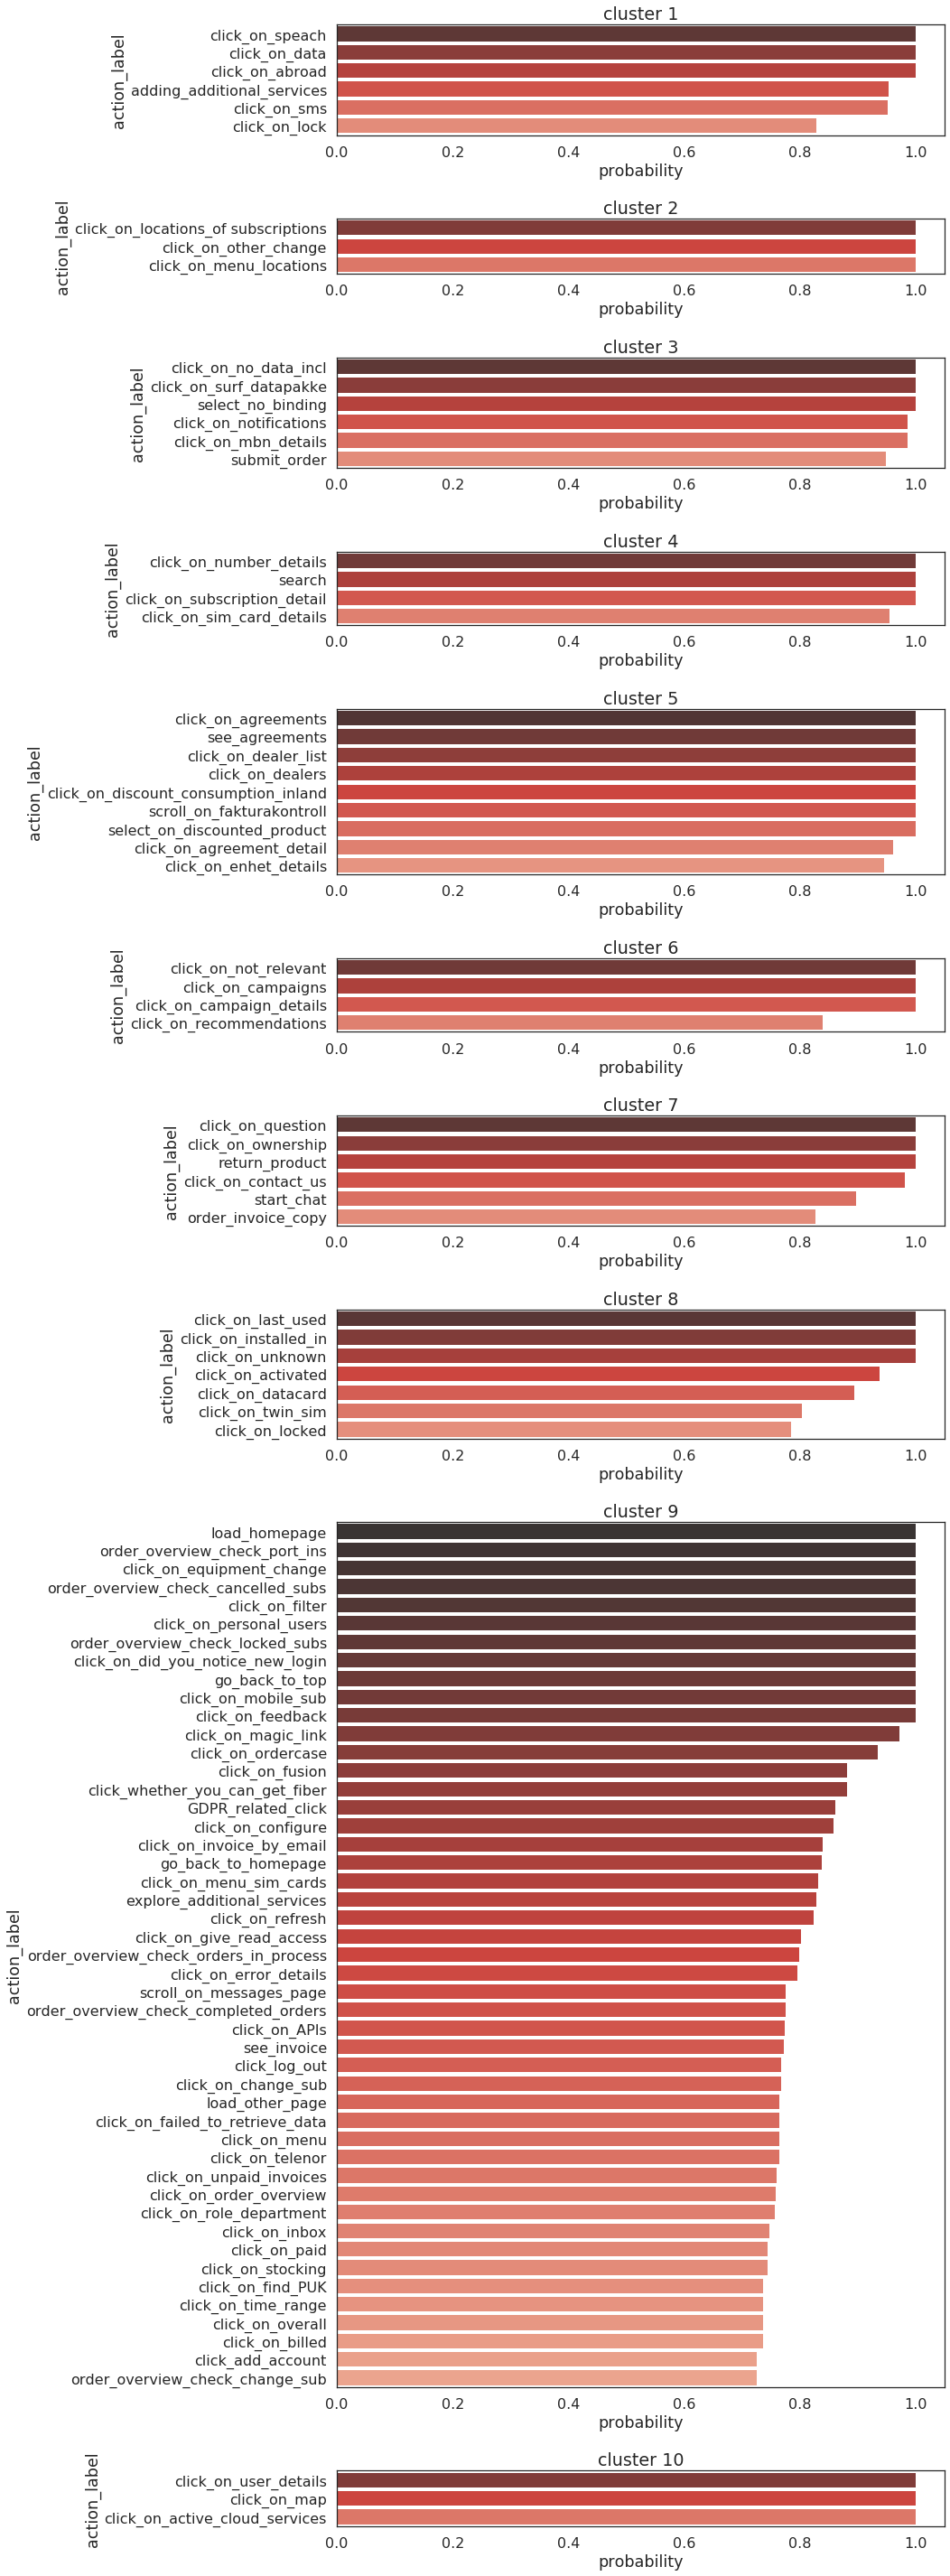

In [100]:
from matplotlib import gridspec

fiz=plt.figure(figsize=(15,40))
num_clusters = len(set(labels.cluster_labels)) - 1

num_rows = labels[labels['cluster_labels'] != -1].groupby('cluster_labels').size().values
gs = gridspec.GridSpec(num_clusters, 1,
                       height_ratios=num_rows.tolist()
                       )
for i, group in labels[labels['cluster_labels'] != -1].groupby('cluster_labels'):
    df=pd.DataFrame(group, columns=['action_label','cluster_prob']).set_index('action_label')
    #plt.subplot(num_clusters,1,i+1)
    plt.subplot(gs[i])
    plt.title('cluster '+str(i+1))
    sns.barplot(x='cluster_prob', y=df.index, data=df, palette='Reds_d')
    plt.xlabel('probability')

fiz.tight_layout()
#plt.subplots_adjust()
plt.show()
